In [83]:
import shutil
import librosa
import librosa.display
import numpy as np
import pandas as pd
import skimage.io
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./dataset/esc50.csv')
df.head()

filename  fold  target        category  esc10  src_file take
0   1-100032-A-0.wav     1       0             dog   True    100032    A
1  1-100038-A-14.wav     1      14  chirping_birds  False    100038    A
2  1-100210-A-36.wav     1      36  vacuum_cleaner  False    100210    A
3  1-100210-B-36.wav     1      36  vacuum_cleaner  False    100210    B
4  1-101296-A-19.wav     1      19    thunderstorm  False    101296    A

In [3]:
df.describe()

fold       target       src_file
count  2000.000000  2000.000000    2000.000000
mean      3.000000    24.500000  137696.797500
std       1.414567    14.434479   64882.993641
min       1.000000     0.000000     137.000000
25%       2.000000    12.000000   87726.250000
50%       3.000000    24.500000  143745.500000
75%       4.000000    37.000000  188215.000000
max       5.000000    49.000000  264453.000000

In [4]:
df = df.drop(['fold', 'target', 'esc10', 'src_file', 'take'], axis=1)
df.head()

filename        category
0   1-100032-A-0.wav             dog
1  1-100038-A-14.wav  chirping_birds
2  1-100210-A-36.wav  vacuum_cleaner
3  1-100210-B-36.wav  vacuum_cleaner
4  1-101296-A-19.wav    thunderstorm

In [5]:
classes = sorted(list(df['category'].unique()))

with open('classes.txt', 'w') as f:
    f.write("\n".join(classes))

with open('classes.txt', 'r') as f:
    classes = list(map(lambda x: x.replace('\n', ''), f.readlines()))

classes

['airplane',
 'breathing',
 'brushing_teeth',
 'can_opening',
 'car_horn',
 'cat',
 'chainsaw',
 'chirping_birds',
 'church_bells',
 'clapping',
 'clock_alarm',
 'clock_tick',
 'coughing',
 'cow',
 'crackling_fire',
 'crickets',
 'crow',
 'crying_baby',
 'dog',
 'door_wood_creaks',
 'door_wood_knock',
 'drinking_sipping',
 'engine',
 'fireworks',
 'footsteps',
 'frog',
 'glass_breaking',
 'hand_saw',
 'helicopter',
 'hen',
 'insects',
 'keyboard_typing',
 'laughing',
 'mouse_click',
 'pig',
 'pouring_water',
 'rain',
 'rooster',
 'sea_waves',
 'sheep',
 'siren',
 'sneezing',
 'snoring',
 'thunderstorm',
 'toilet_flush',
 'train',
 'vacuum_cleaner',
 'washing_machine',
 'water_drops',
 'wind']

In [91]:
def plot_wave_and_mel_spec(path, category):
    
    signal, sr = librosa.load(path)
    mel_spec = librosa.feature.melspectrogram(y=signal,
                                              sr=sr,
                                              n_mels=128)

    log_mel_spec = librosa.power_to_db(mel_spec)

    fig, ax = plt.subplots(ncols=2, figsize=(10, 3))
    librosa.display.waveshow(signal, sr=sr, ax=ax[0])
    librosa.display.specshow(log_mel_spec, ax=ax[1], x_axis='time', y_axis='mel')

    plt.suptitle(category)
    plt.savefig(f'./readme_media/{category}.png')
    plt.show()

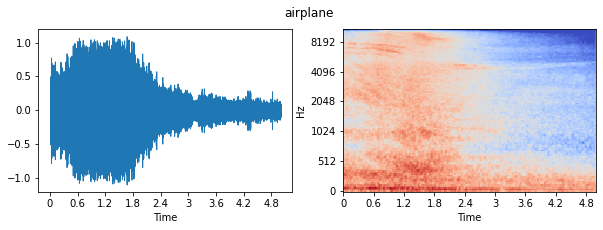

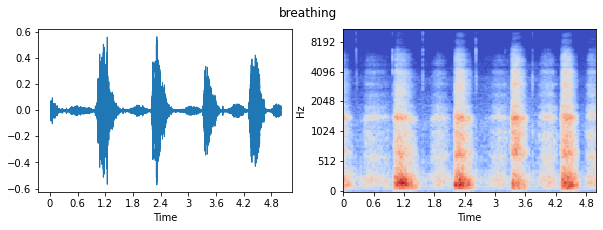

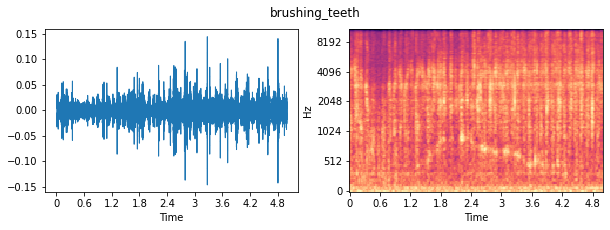

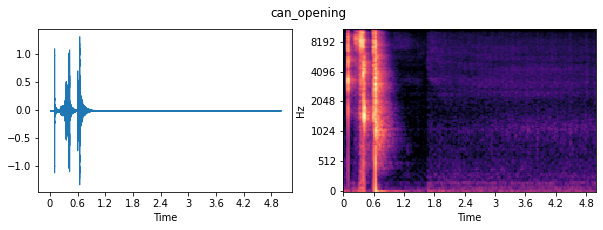

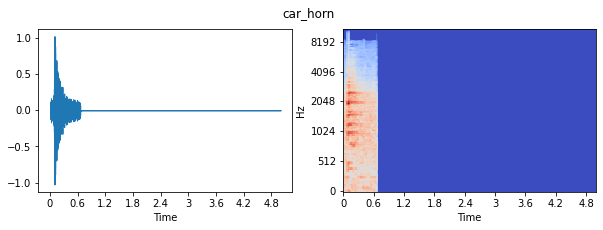

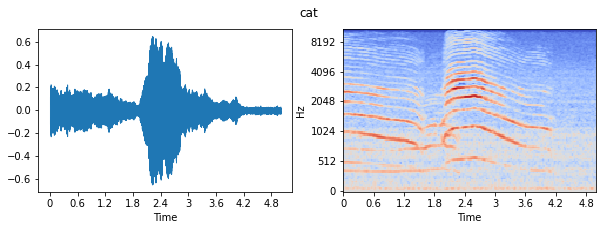

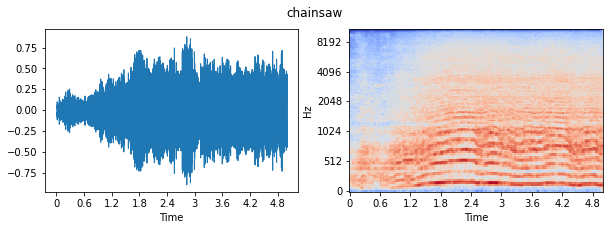

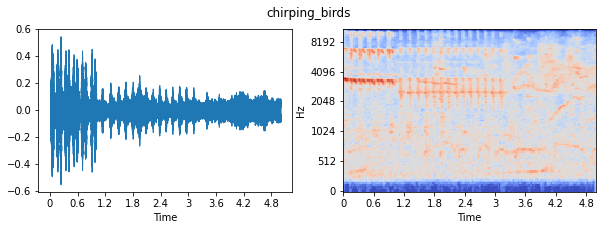

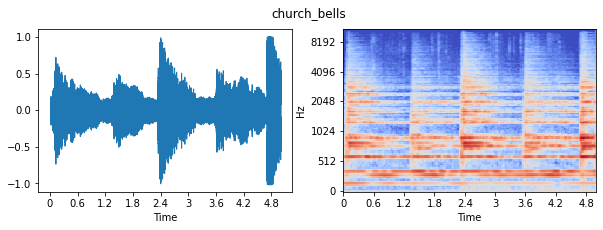

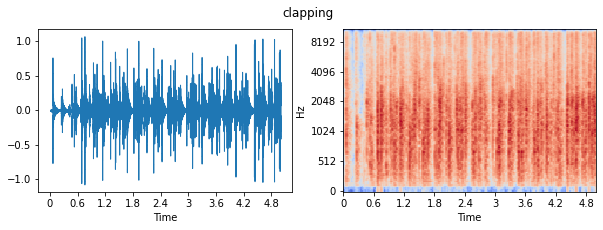

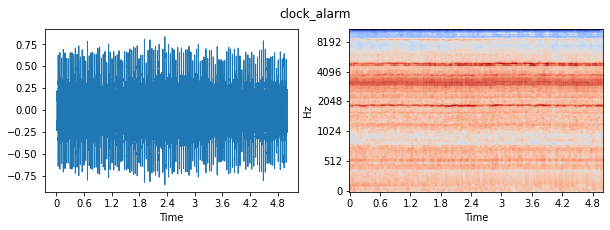

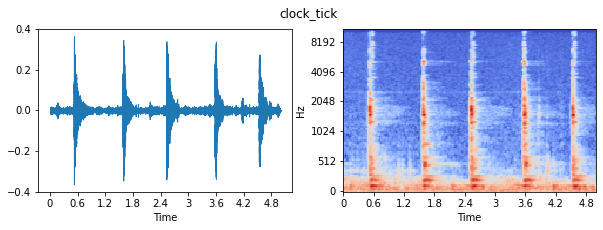

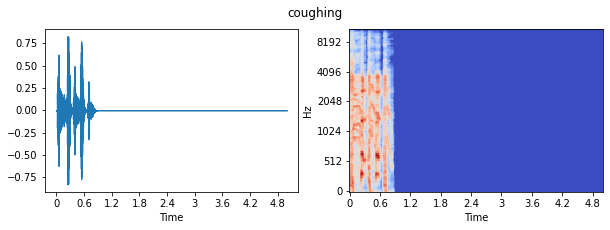

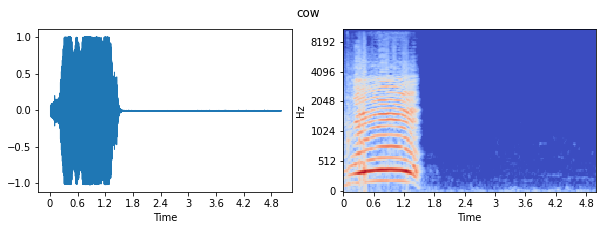

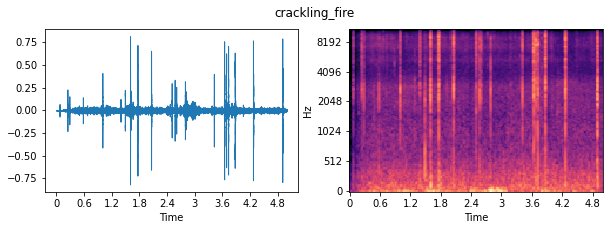

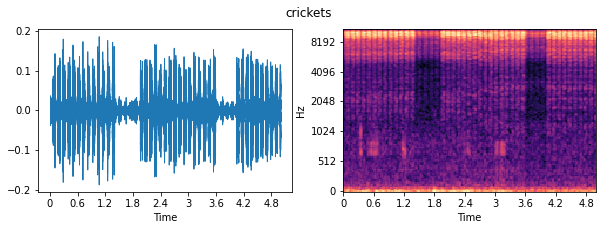

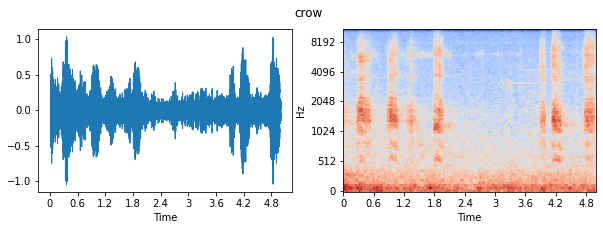

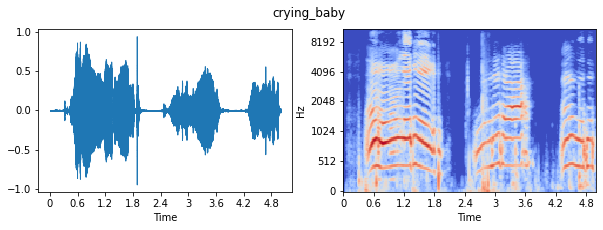

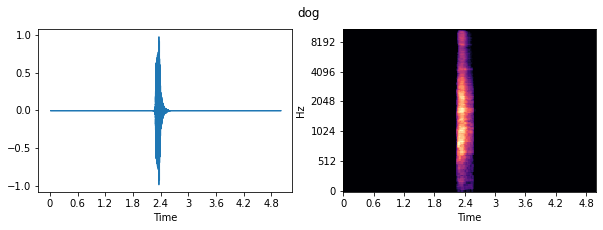

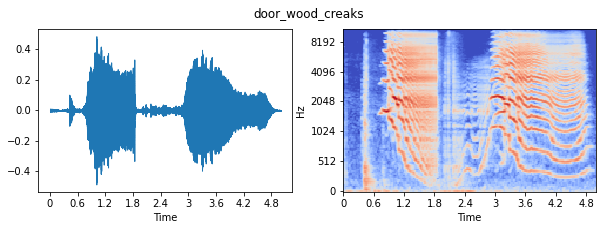

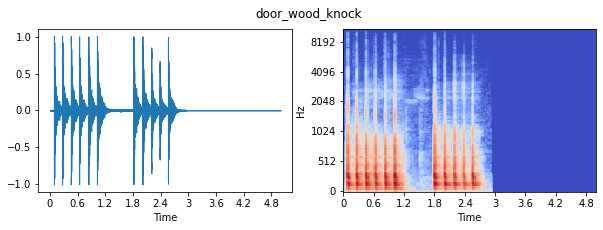

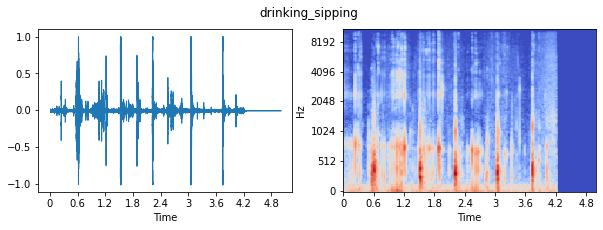

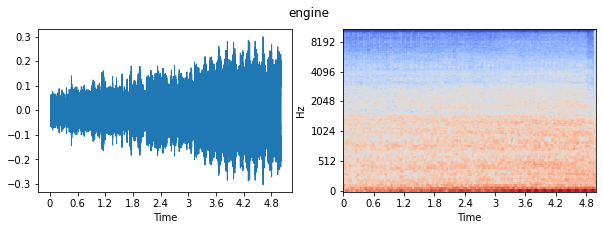

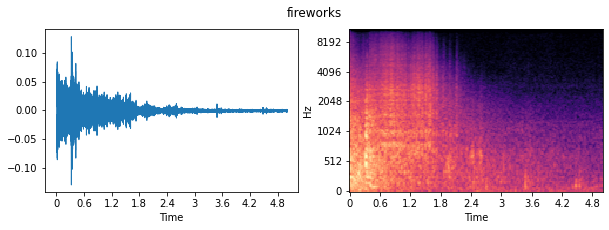

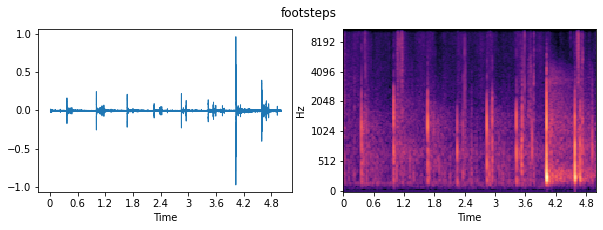

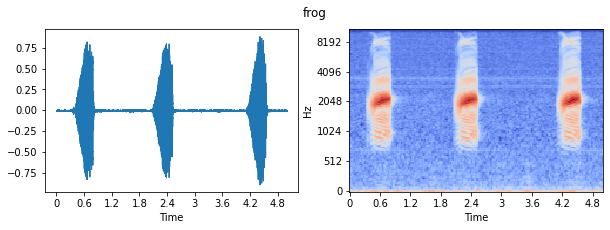

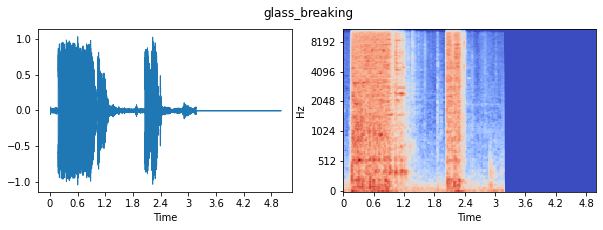

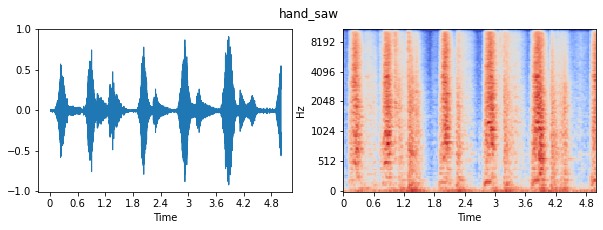

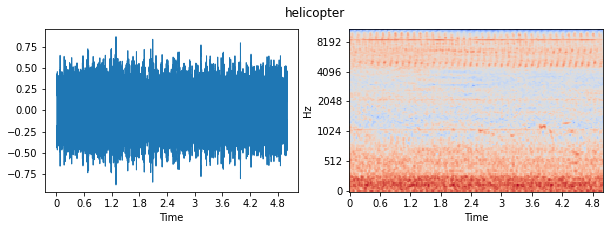

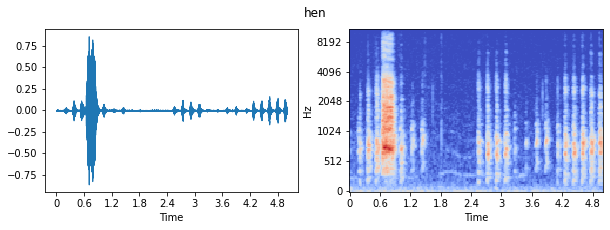

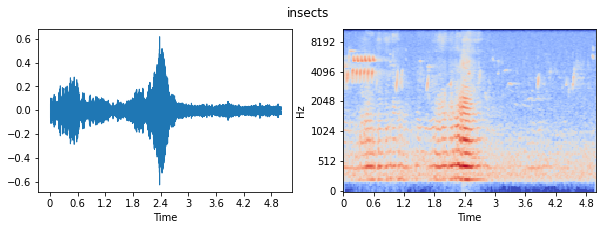

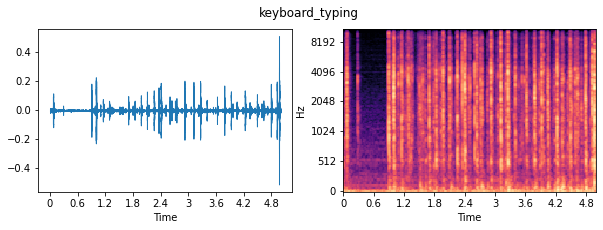

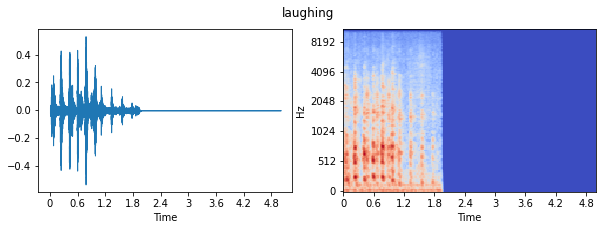

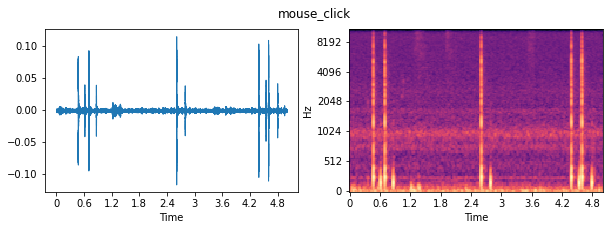

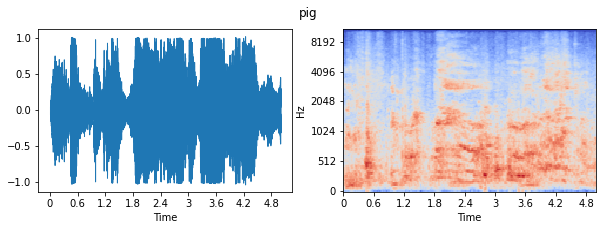

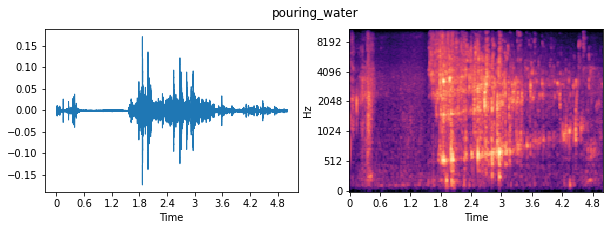

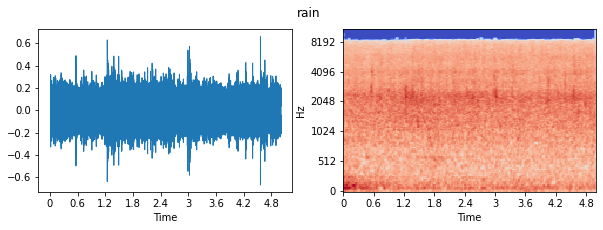

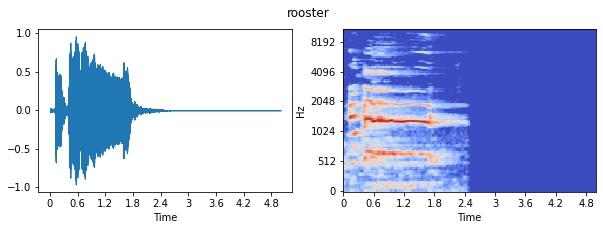

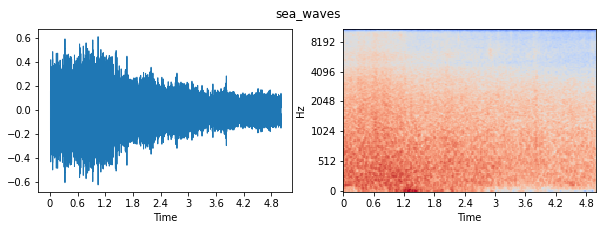

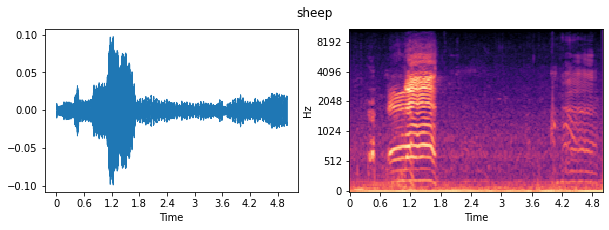

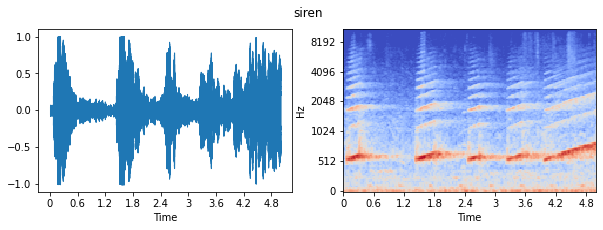

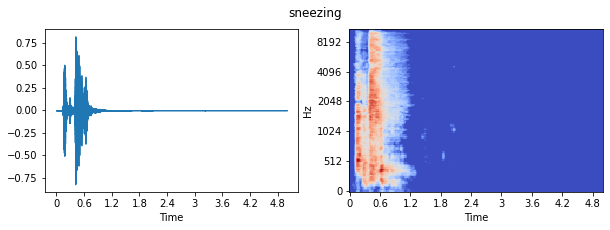

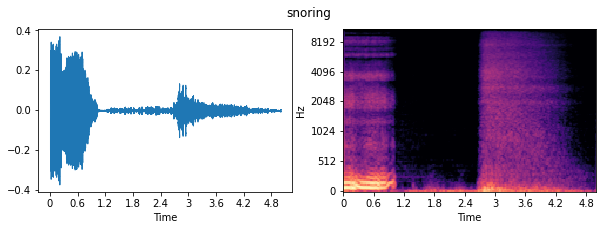

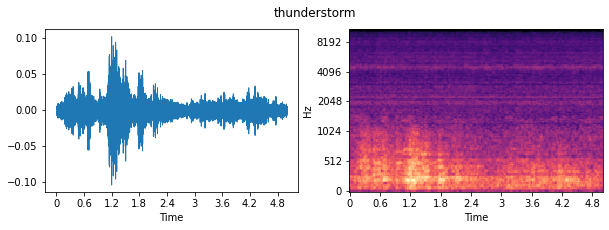

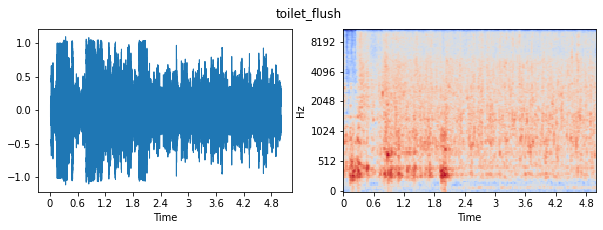

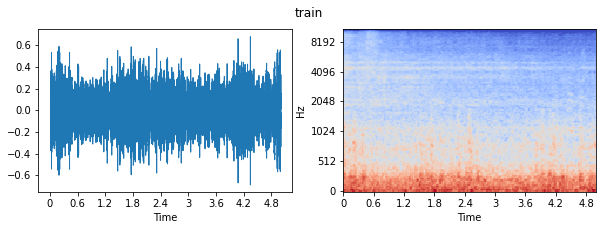

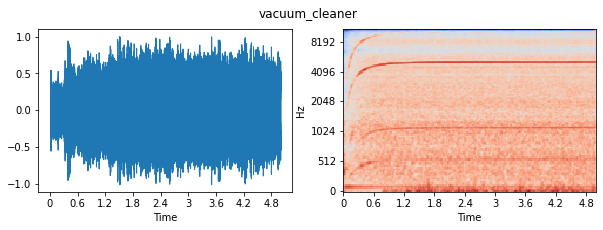

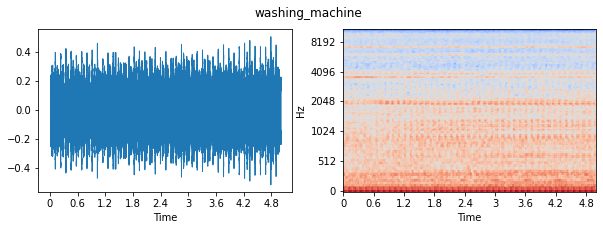

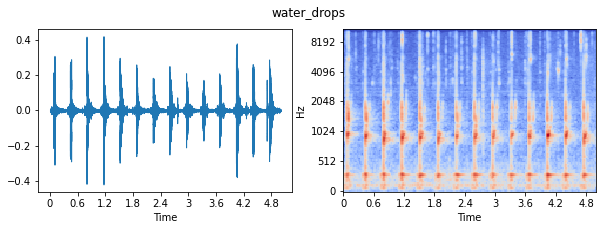

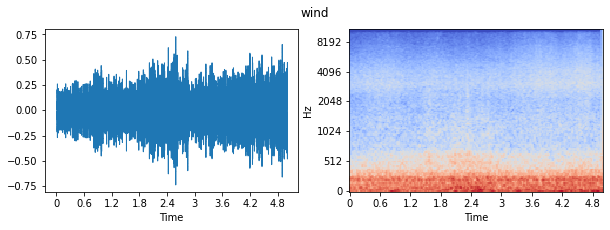

In [92]:
df_unique = df.groupby('category', as_index=False).first()

for row, rowseries in df_unique.iterrows():
    path = f'./dataset/audio/{rowseries.filename}'
    plot_wave_and_mel_spec(path, rowseries.category)

In [68]:
def scale_minmax(X, min=0.0, max=1.0):
    X_std = (X - X.min()) / (X.max() - X.min())
    X_scaled = X_std * (max - min) + min
    return X_scaled


def save_log_mel_spec(in_path, out_path):
    signal, sr = librosa.load(in_path)
    mel_spec = librosa.feature.melspectrogram(y=signal,
                                              sr=sr,
                                              n_mels=128)

    log_mel_spec = librosa.power_to_db(mel_spec)
    img = scale_minmax(log_mel_spec, 0, 255).astype(np.uint8)

    skimage.io.imsave(out_path, img)

In [73]:
for row, rowseries in df.iterrows():
    path = f'./dataset/audio/{rowseries.filename}'
    save_log_mel_spec(path, f'./dataset/train/{rowseries.category}/{rowseries.filename}.png')

In [84]:
for c in classes:
    for img in os.listdir(f'./dataset/train/{c}')[:4]:
        source = f'./dataset/train/{c}/{img}'
        destination = f'./dataset/test/{c}/{img}'
        shutil.move(source, destination)